### 1. Importing Libraries & Datasets

In [4]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [5]:
# checking matplotlib version

matplotlib.__version__

'3.6.0'

In [6]:
# import datasets

# create path for dataset 
path = r'C:\Users\pears\Desktop\CF\Achievement 6\datasets'

# create filepaths
filepath1 = os.path.join(path, '.pkl', 'all_merge.pkl')
filepath2 = os.path.join(path, '.pkl', 'all_merge_numbers.pkl')

# assign df names
ALL = pd.read_pickle(filepath1)
ALL_num = pd.read_pickle(filepath2)

### 2. Data Cleaning

#### a. Changing data types

In [7]:
# remove column limit of output 

pd.options.display.max_columns = None

In [8]:
# remove rows limit of output 

pd.options.display.max_rows = None

In [9]:
ALL_num.head(5)

,Entity,Code,Continent,Region,Schizophrenia,Bipolar,Eating,Anxiety,Depressive,Average_ALL,GDPpc,AHDI,Income_group,Legis,Policy,%Invest,F/F_have_been_A/D_YES,Very_comfortable_speaking_about_A/D_with_F/F_YES,Verycomfortable_vs_Havebeen,talked_to_F/F,spent_time_in_nature_outdoors,improved_healthy_lifestyle_behaviors,made_change_to_personal_relationships,made_change_to_work_situation,took_prescribed_medication,talked_to_mental_health_professional,engaged_in_religious_spiritual_activities,Life_ladder,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Perceptions_of_corruption,Positive_affect,Negative_affect
0,Afghanistan,AFG,Asia,Southern Asia,0.2260,0.7260,0.1218,5.0337,5.1315,2.2478,"1,934.56",0.1804,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.662,0.491,53.25,0.427,0.954,0.435,0.371
1,Albania,ALB,Europe,Southern Europe,0.3071,0.5790,0.1460,4.0993,2.6280,1.5519,"11,104.17",0.5165,3,1,1,NaN,28.00,25.49,-0.09,86.52499,88.64183,67.71693,54.1925,39.66084,40.89743,34.49906,36.1776,4.640,0.638,69.05,0.750,0.876,0.547,0.334
2,Algeria,DZA,Africa,Northern Africa,0.2638,0.8008,0.2230,5.0529,4.3729,2.1427,"14,228.03",0.3229,2,1,1,7.37,20.88,31.64,0.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.249,0.807,66.20,0.437,0.700,0.555,0.289
3,American Samoa,ASM,Oceania,Polynesia,0.3192,0.2943,0.1348,4.2545,2.7973,1.5600,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,Europe,Southern Europe,0.3157,1.0300,0.5739,6.0083,3.9744,2.3805,NaN,NaN,4,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# checking data types 

ALL_num.dtypes

Entity                                               object
Code                                                 object
Continent                                            object
Region                                               object
Schizophrenia                                       float64
Bipolar                                             float64
Eating                                              float64
Anxiety                                             float64
Depressive                                          float64
Average_ALL                                         float64
GDPpc                                                object
AHDI                                                float64
Income_group                                         object
Legis                                                object
Policy                                               object
%Invest                                             float64
F/F_have_been_A/D_YES                   

In [11]:
# change some object columns to float64 

ALL_num = ALL_num.astype({'Income_group': 'float64', 'Legis': 'float64', 'Policy': 'float64'})

In [12]:
ALL_num.dtypes

Entity                                               object
Code                                                 object
Continent                                            object
Region                                               object
Schizophrenia                                       float64
Bipolar                                             float64
Eating                                              float64
Anxiety                                             float64
Depressive                                          float64
Average_ALL                                         float64
GDPpc                                                object
AHDI                                                float64
Income_group                                        float64
Legis                                               float64
Policy                                              float64
%Invest                                             float64
F/F_have_been_A/D_YES                   

Kept getting error messages when I tried to change column 'GDPpc' to float64 or int. It is assigned as object. I exported it as .csv to open and change in Excel and imported it back here but it goes back to object...

In [13]:
# checking for mix-type data

for col in ALL_num.columns.tolist():
      weird = (ALL_num[[col]].applymap(type) != ALL_num[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (ALL_num[weird]) > 0:
        print (col)

Code
GDPpc


#### b. Checking for missing values

In [14]:
ALL_num.isnull().sum()

Entity                                                0
Code                                                  2
Continent                                             0
Region                                                0
Schizophrenia                                         0
Bipolar                                               0
Eating                                                0
Anxiety                                               0
Depressive                                            0
Average_ALL                                           0
GDPpc                                                40
AHDI                                                 47
Income_group                                          9
Legis                                                18
Policy                                               20
%Invest                                             128
F/F_have_been_A/D_YES                                95
Very_comfortable_speaking_about_A/D_with_F/F_YES

#### c. Checking for duplicates

In [15]:
ALL_num_dups = ALL_num[ALL_num.duplicated()]

In [16]:
ALL_num_dups

,Entity,Code,Continent,Region,Schizophrenia,Bipolar,Eating,Anxiety,Depressive,Average_ALL,GDPpc,AHDI,Income_group,Legis,Policy,%Invest,F/F_have_been_A/D_YES,Very_comfortable_speaking_about_A/D_with_F/F_YES,Verycomfortable_vs_Havebeen,talked_to_F/F,spent_time_in_nature_outdoors,improved_healthy_lifestyle_behaviors,made_change_to_personal_relationships,made_change_to_work_situation,took_prescribed_medication,talked_to_mental_health_professional,engaged_in_religious_spiritual_activities,Life_ladder,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Perceptions_of_corruption,Positive_affect,Negative_affect


No duplicates

#### d. Creating a subset for correlations (removing first four object columns)

In [17]:
ALL_num_correl = ALL_num.copy()
columns_to_remove = ['Entity', 'Code', 'Continent', 'Region', 'GDPpc', 'Schizophrenia', 'Bipolar', 'Eating', 'Average_ALL', 'Legis', 'Policy']
ALL_num_correl.drop(columns=columns_to_remove, inplace=True)

In [18]:
ALL_num_correl.head()

,Anxiety,Depressive,AHDI,Income_group,%Invest,F/F_have_been_A/D_YES,Very_comfortable_speaking_about_A/D_with_F/F_YES,Verycomfortable_vs_Havebeen,talked_to_F/F,spent_time_in_nature_outdoors,improved_healthy_lifestyle_behaviors,made_change_to_personal_relationships,made_change_to_work_situation,took_prescribed_medication,talked_to_mental_health_professional,engaged_in_religious_spiritual_activities,Life_ladder,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Perceptions_of_corruption,Positive_affect,Negative_affect
0,5.0337,5.1315,0.1804,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.662,0.491,53.25,0.427,0.954,0.435,0.371
1,4.0993,2.6280,0.5165,3.0,NaN,28.00,25.49,-0.09,86.52499,88.64183,67.71693,54.1925,39.66084,40.89743,34.49906,36.1776,4.640,0.638,69.05,0.750,0.876,0.547,0.334
2,5.0529,4.3729,0.3229,2.0,7.37,20.88,31.64,0.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.249,0.807,66.20,0.437,0.700,0.555,0.289
3,4.2545,2.7973,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6.0083,3.9744,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# shortening columns names

ALL_num_correl.rename(columns = {'Anxiety':'anxiety', 'Depressive':'depressive', 'Income_group':'income', '%Invest':'gov_invest', 'F/F_have_been_A/D_YES':'ffAD', 'Very_comfortable_speaking_about_A/D_with_F/F_YES':'comfortable', 'Verycomfortable_vs_Havebeen':'vs', 'talked_to_F/F':'f/f', 'spent_time_in_nature_outdoors':'nature', 'improved_healthy_lifestyle_behaviors':'lifestyle', 'made_change_to_personal_relationships':'relationships', 'made_change_to_work_situation':'work', 'took_prescribed_medication':'meds', 'talked_to_mental_health_professional':'prof','engaged_in_religious_spiritual_activities':'religion', 'Life_ladder':'life_ladder', 'Social_support':'social_support', 'Healthy_life_expectancy_at_birth':'life_expectancy', 'Freedom_to_make_life_choices':'choice_freedom', 'Perceptions_of_corruption':'corruption', 'Positive_affect':'pos', 'Negative_affect':'neg' }, inplace=True)

In [20]:
ALL_num_correl.head()

,anxiety,depressive,AHDI,income,gov_invest,ffAD,comfortable,vs,f/f,nature,lifestyle,relationships,work,meds,prof,religion,life_ladder,social_support,life_expectancy,choice_freedom,corruption,pos,neg
0,5.0337,5.1315,0.1804,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.662,0.491,53.25,0.427,0.954,0.435,0.371
1,4.0993,2.6280,0.5165,3.0,NaN,28.00,25.49,-0.09,86.52499,88.64183,67.71693,54.1925,39.66084,40.89743,34.49906,36.1776,4.640,0.638,69.05,0.750,0.876,0.547,0.334
2,5.0529,4.3729,0.3229,2.0,7.37,20.88,31.64,0.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.249,0.807,66.20,0.437,0.700,0.555,0.289
3,4.2545,2.7973,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6.0083,3.9744,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3. Exploring Relationships

#### a. Correlation

In [21]:
# create a correlation matrix using pandas

ALL_num_correl.corr()

,anxiety,depressive,AHDI,income,gov_invest,ffAD,comfortable,vs,f/f,nature,lifestyle,relationships,work,meds,prof,religion,life_ladder,social_support,life_expectancy,choice_freedom,corruption,pos,neg
anxiety,1.000000,0.160164,0.443430,0.379540,0.436130,0.526921,-0.000895,-0.201517,-0.003094,0.236068,-0.009891,-0.119117,-0.082003,0.169574,0.463990,-0.232056,0.368156,0.266280,0.420323,0.120644,-0.290144,0.151760,0.034515
depressive,0.160164,1.000000,-0.334167,-0.354470,-0.006200,0.149587,0.147850,0.038824,-0.153480,-0.416323,-0.252819,-0.153943,-0.142263,-0.096761,-0.068924,0.135804,-0.347041,-0.384740,-0.466687,-0.270409,-0.030503,-0.202648,0.387552
AHDI,0.443430,-0.334167,1.000000,0.818506,0.739026,0.280204,-0.457692,-0.499676,0.006462,0.475972,0.013747,-0.304845,-0.096365,0.449993,0.758312,-0.641042,0.759471,0.689342,0.800016,0.340979,-0.330578,0.311718,-0.569938
income,0.379540,-0.354470,0.818506,1.000000,0.552281,0.295402,-0.414325,-0.519858,0.064484,0.552770,0.127089,-0.188962,-0.072608,0.380104,0.689344,-0.572081,0.799551,0.731011,0.805503,0.397885,-0.296648,0.336853,-0.571201
gov_invest,0.436130,-0.006200,0.739026,0.552281,1.000000,0.162588,-0.215160,-0.200239,-0.061383,0.226764,-0.128358,-0.384226,-0.210097,0.499806,0.595431,-0.682984,0.583825,0.509661,0.633905,0.173146,-0.415768,0.138196,-0.377860
ffAD,0.526921,0.149587,0.280204,0.295402,0.162588,1.000000,-0.026660,-0.473333,0.175847,0.228847,0.178189,0.311764,0.203169,0.200042,0.377465,-0.087816,0.354087,0.281397,0.219278,0.169714,-0.267814,0.362603,0.066665
comfortable,-0.000895,0.147850,-0.457692,-0.414325,-0.215160,-0.026660,1.000000,0.838567,0.009170,-0.232849,-0.129297,0.065962,-0.126588,-0.329866,-0.466972,0.184183,-0.344630,-0.337673,-0.287386,-0.019815,0.041649,-0.172731,0.342701
vs,-0.201517,0.038824,-0.499676,-0.519858,-0.200239,-0.473333,0.838567,1.000000,-0.013748,-0.241256,-0.095746,-0.042983,-0.093459,-0.277877,-0.494337,0.196103,-0.418839,-0.374152,-0.307204,-0.027288,0.102174,-0.230845,0.235831
f/f,-0.003094,-0.153480,0.006462,0.064484,-0.061383,0.175847,0.009170,-0.013748,1.000000,0.309944,0.596273,0.411825,0.451935,0.351750,0.206497,0.275251,0.011474,-0.021576,-0.122406,0.215585,-0.024233,0.254301,0.126254
nature,0.236068,-0.416323,0.475972,0.552770,0.226764,0.228847,-0.232849,-0.241256,0.309944,1.000000,0.390818,0.174728,0.183314,0.372474,0.440326,-0.311390,0.543290,0.482867,0.558231,0.207165,-0.139550,0.342746,-0.270064


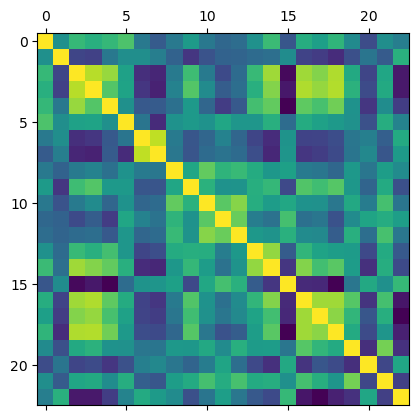

In [22]:
# create a correlation heatmap using matplotlib

plt.matshow(ALL_num_correl.corr())
plt.show()

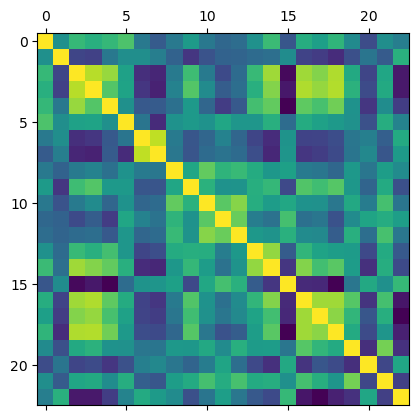

In [23]:
# save figure
plt.matshow(ALL_num_correl.corr())
plt.savefig("out.png") 

# This will save the image in the working directory. 
# If you don't know what this directory is the next line will show you how to check

In [24]:
#current dir

cwd = os.getcwd()
cwd

'C:\\Users\\pears\\Desktop\\CF\\Achievement 6\\scripts'

Text(0.5, 1.0, 'Correlation Matrix')

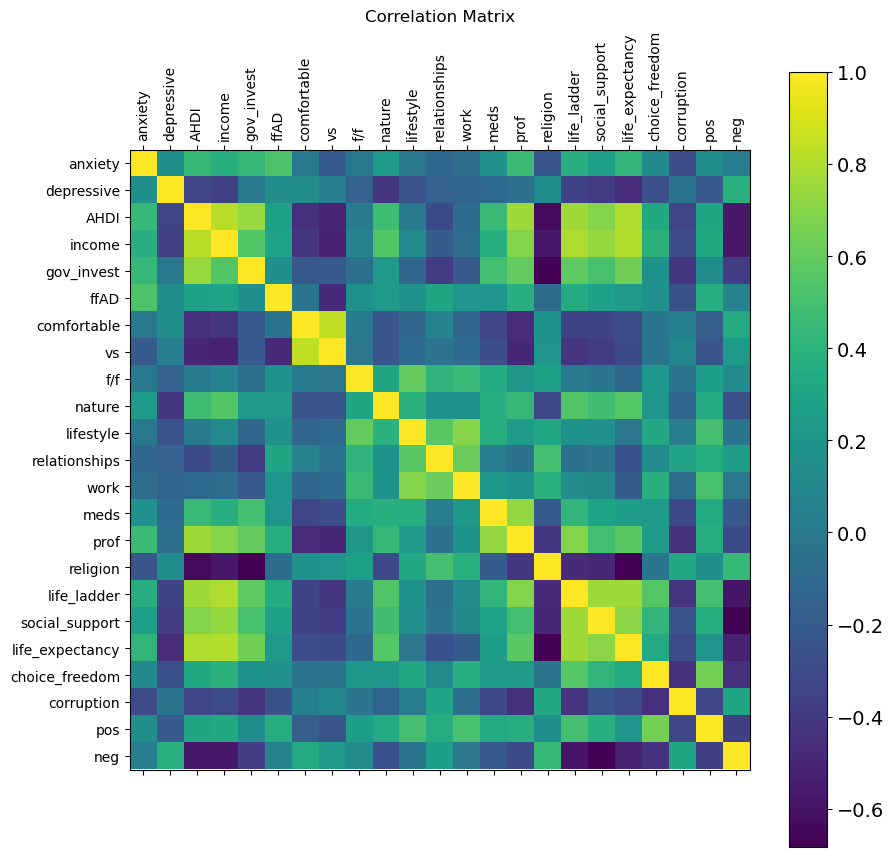

In [25]:
# add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(10, 10)) # figure size 
plt.matshow(ALL_num_correl.corr(), fignum=f.number) # type of plot
plt.xticks(range(ALL_num_correl.shape[1]), ALL_num_correl.columns, fontsize=10, rotation=90) # x axis labels
plt.yticks(range(ALL_num_correl.shape[1]), ALL_num_correl.columns, fontsize=10) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=12) # add title

#### Create a correlation heatmap using seaborn

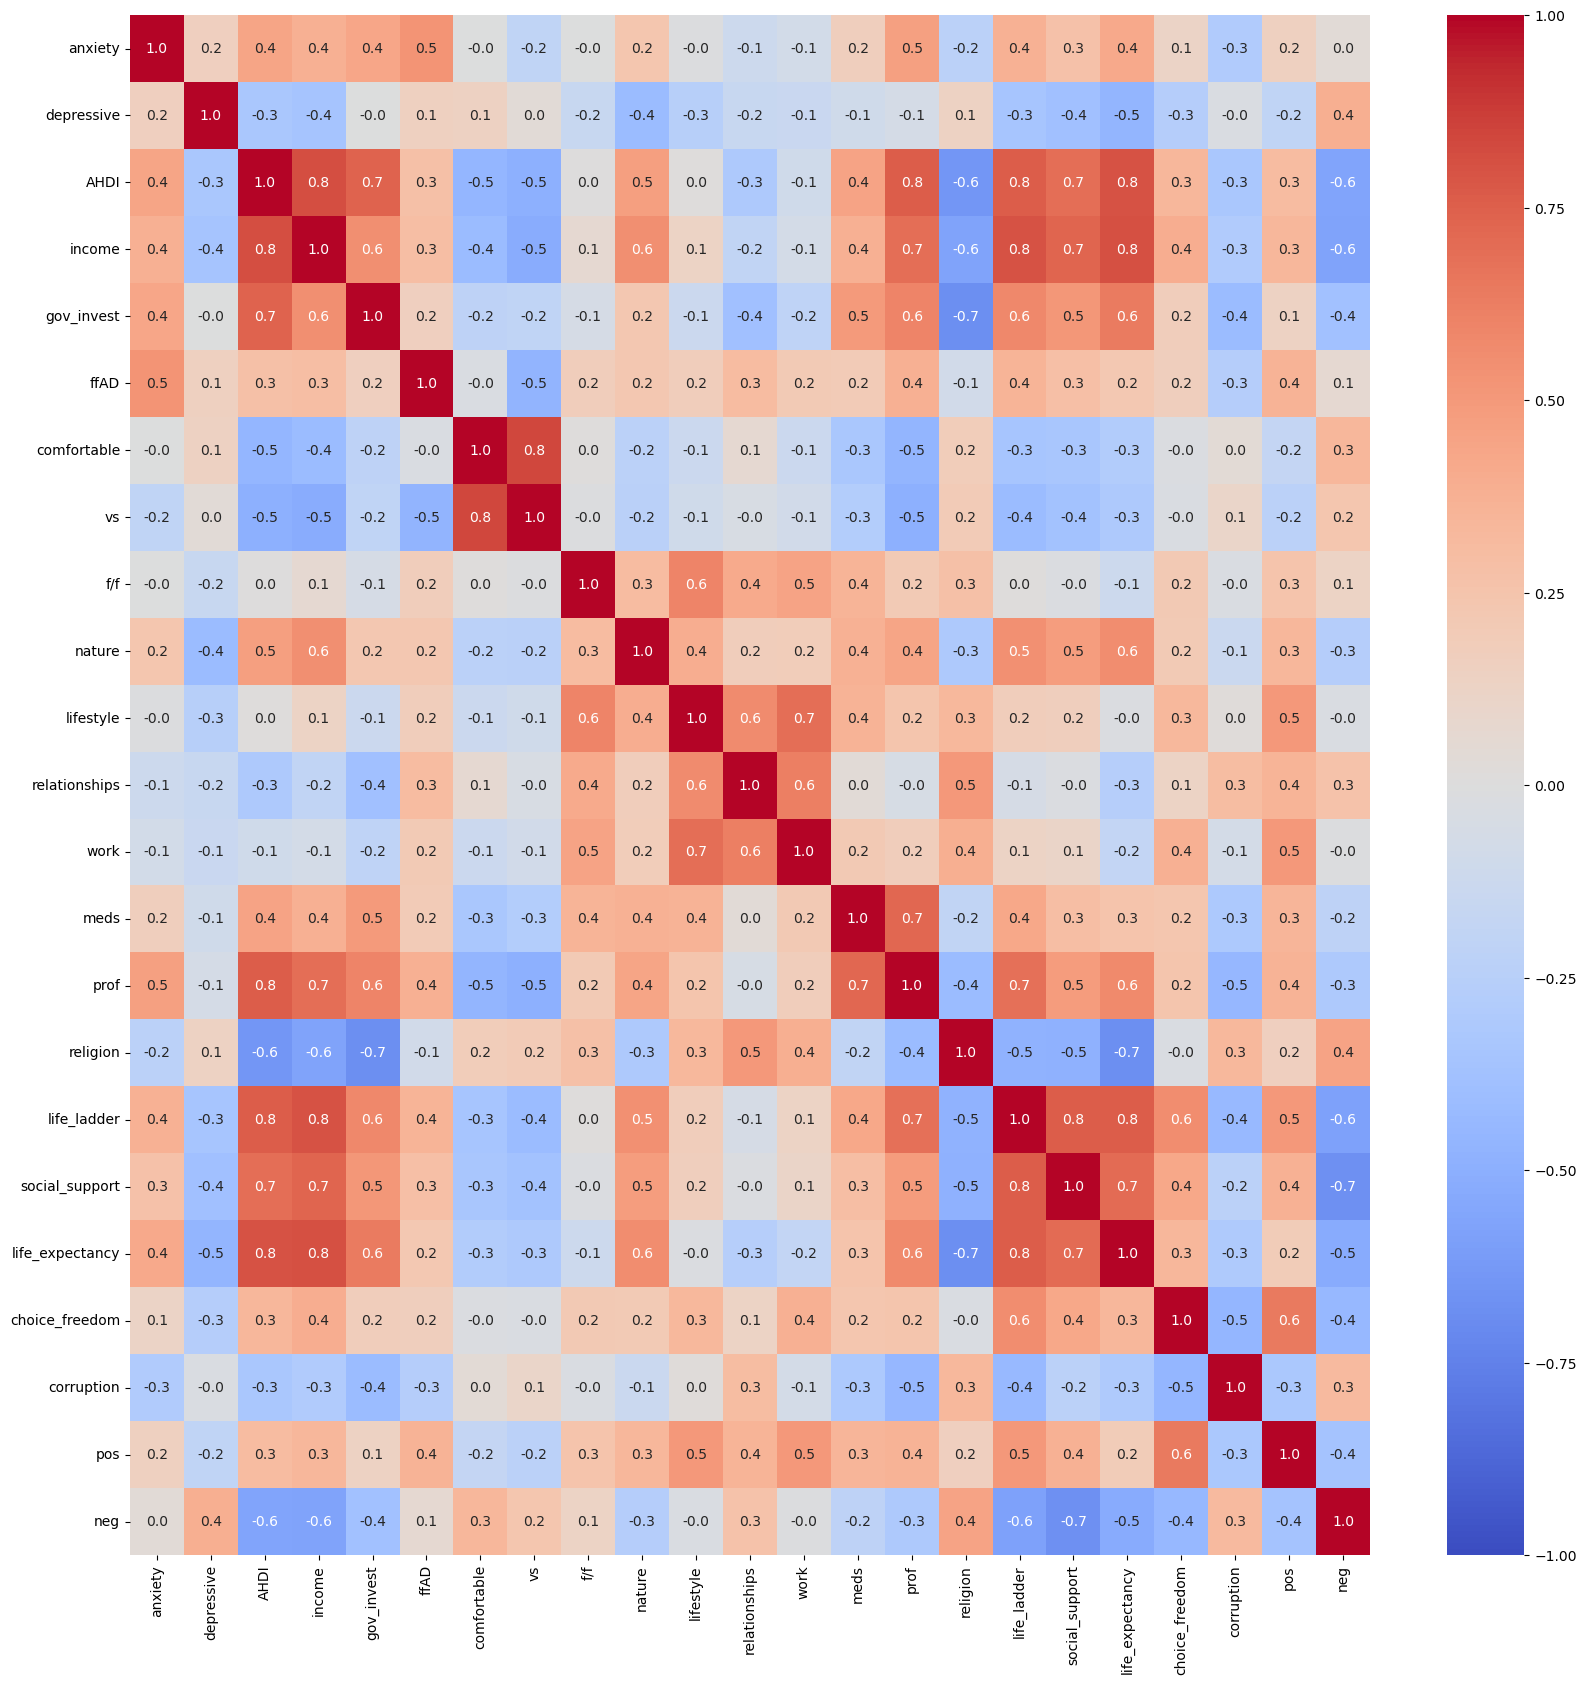

In [26]:
# create subplot with matplotlib
f,ax = plt.subplots(figsize=(20,20))

# create correlation heatmap in seaborn by applying heatmap onto correlation matrix and subplots defined above
corr = sns.heatmap(ALL_num_correl.corr(), annot = True, fmt=".1f", cmap='coolwarm', vmin=-1.0, vmax=1.0, ax = ax) 

# 'annot' allows plot to place correlation coefficients onto heatmap

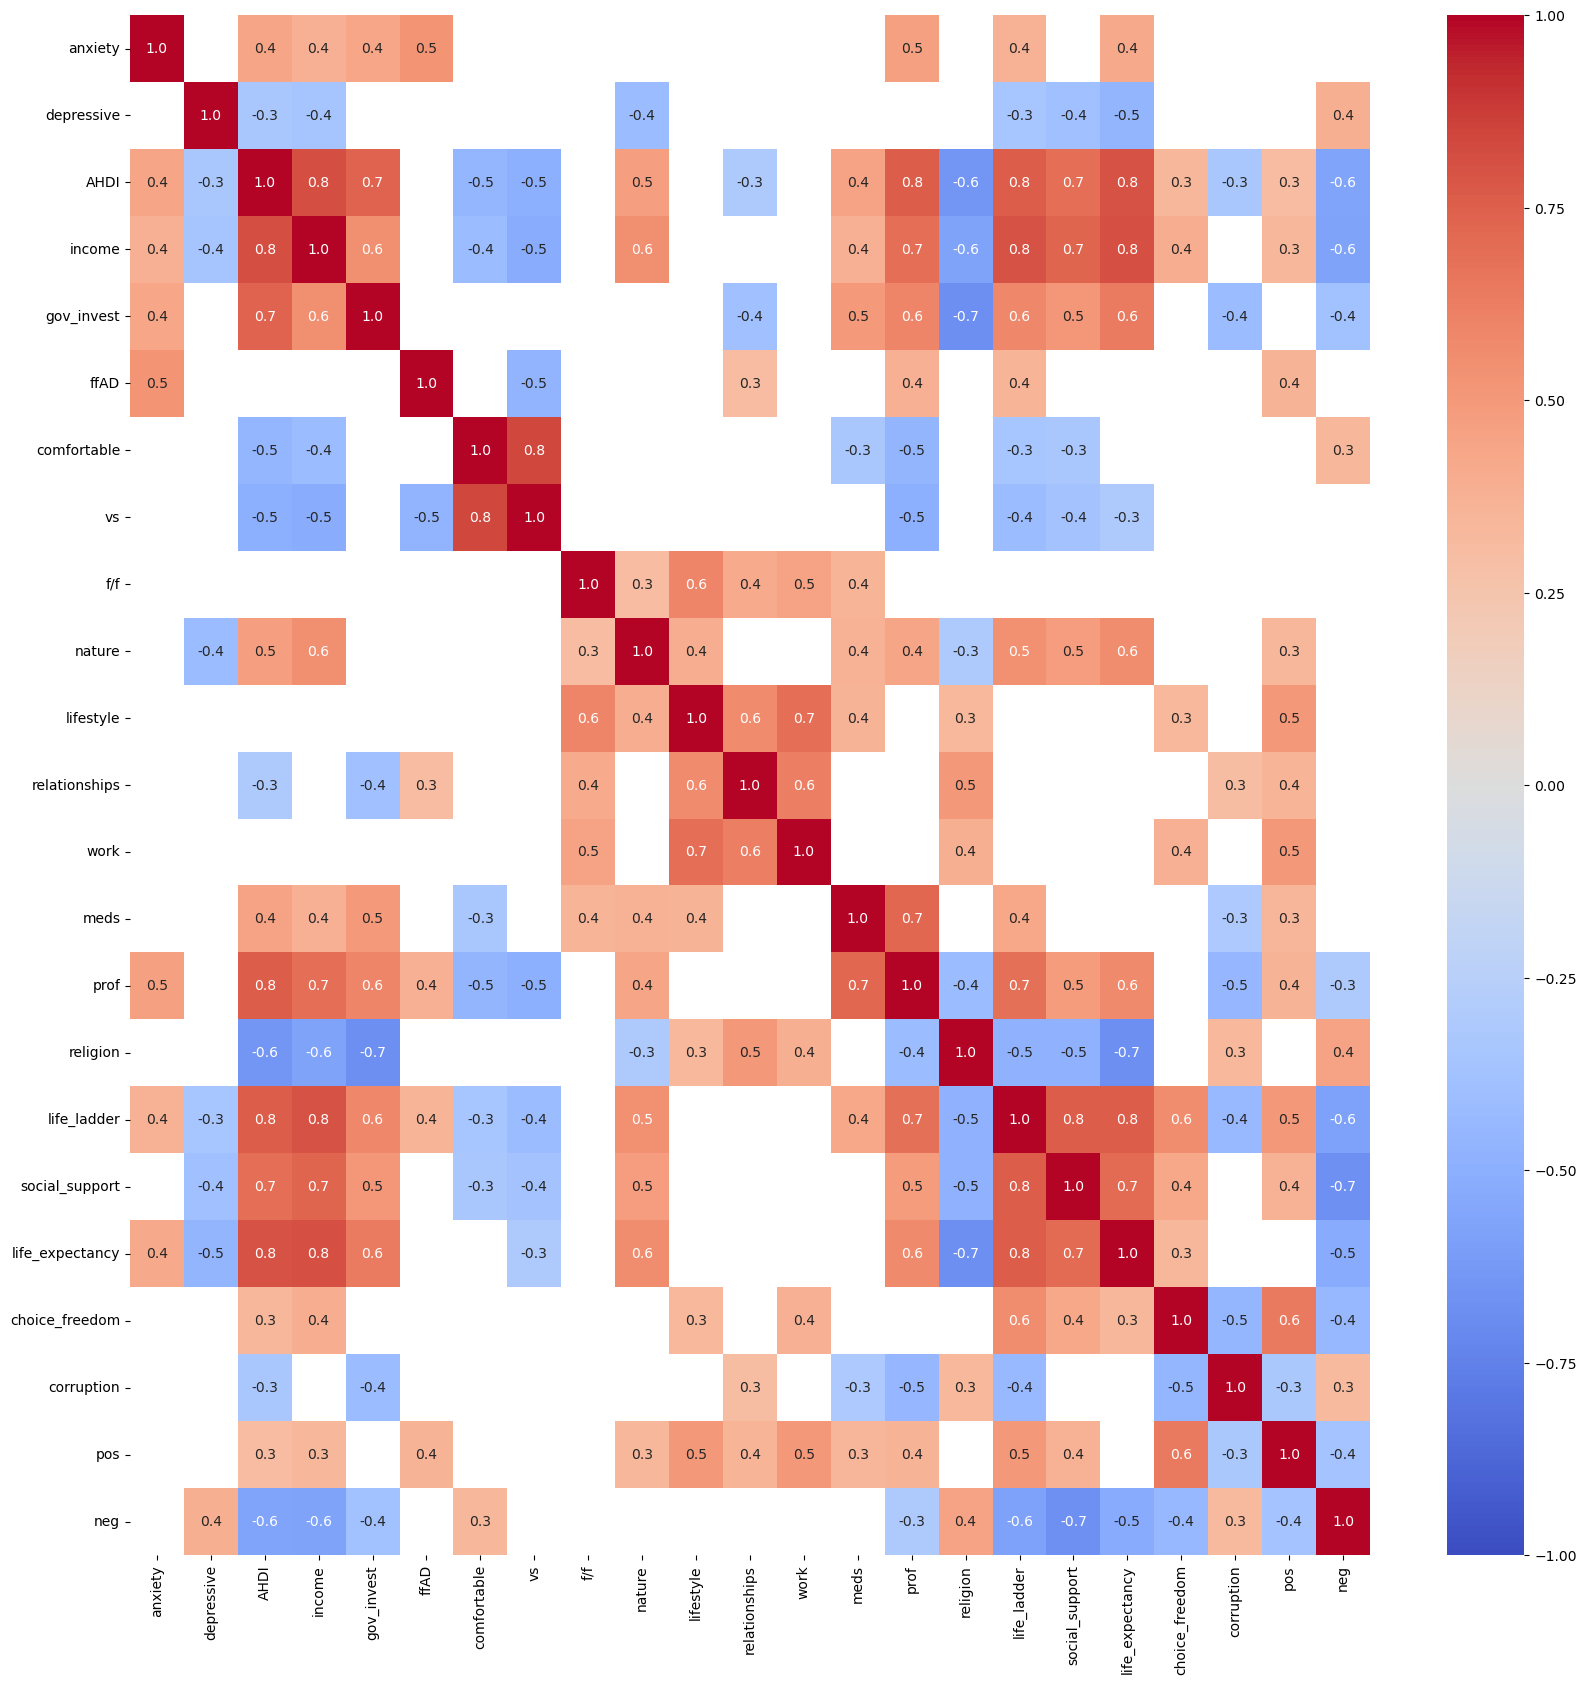

In [27]:
# create subplot with matplotlib
f, ax = plt.subplots(figsize=(20, 20))

# create mask for values outside desired range (-0.3 to 0.3)
mask = (ALL_num_correl.corr() <= -0.3) | (ALL_num_correl.corr() >= 0.3)

# set values outside desired range to NaN
data_masked = ALL_num_correl.corr().where(mask)

# create correlation heatmap in seaborn by applying heatmap onto filtered data
corr = sns.heatmap(data_masked, annot=True, fmt=".1f", cmap='coolwarm', vmin=-1.0, vmax=1.0, ax=ax)

# display plot
plt.show()

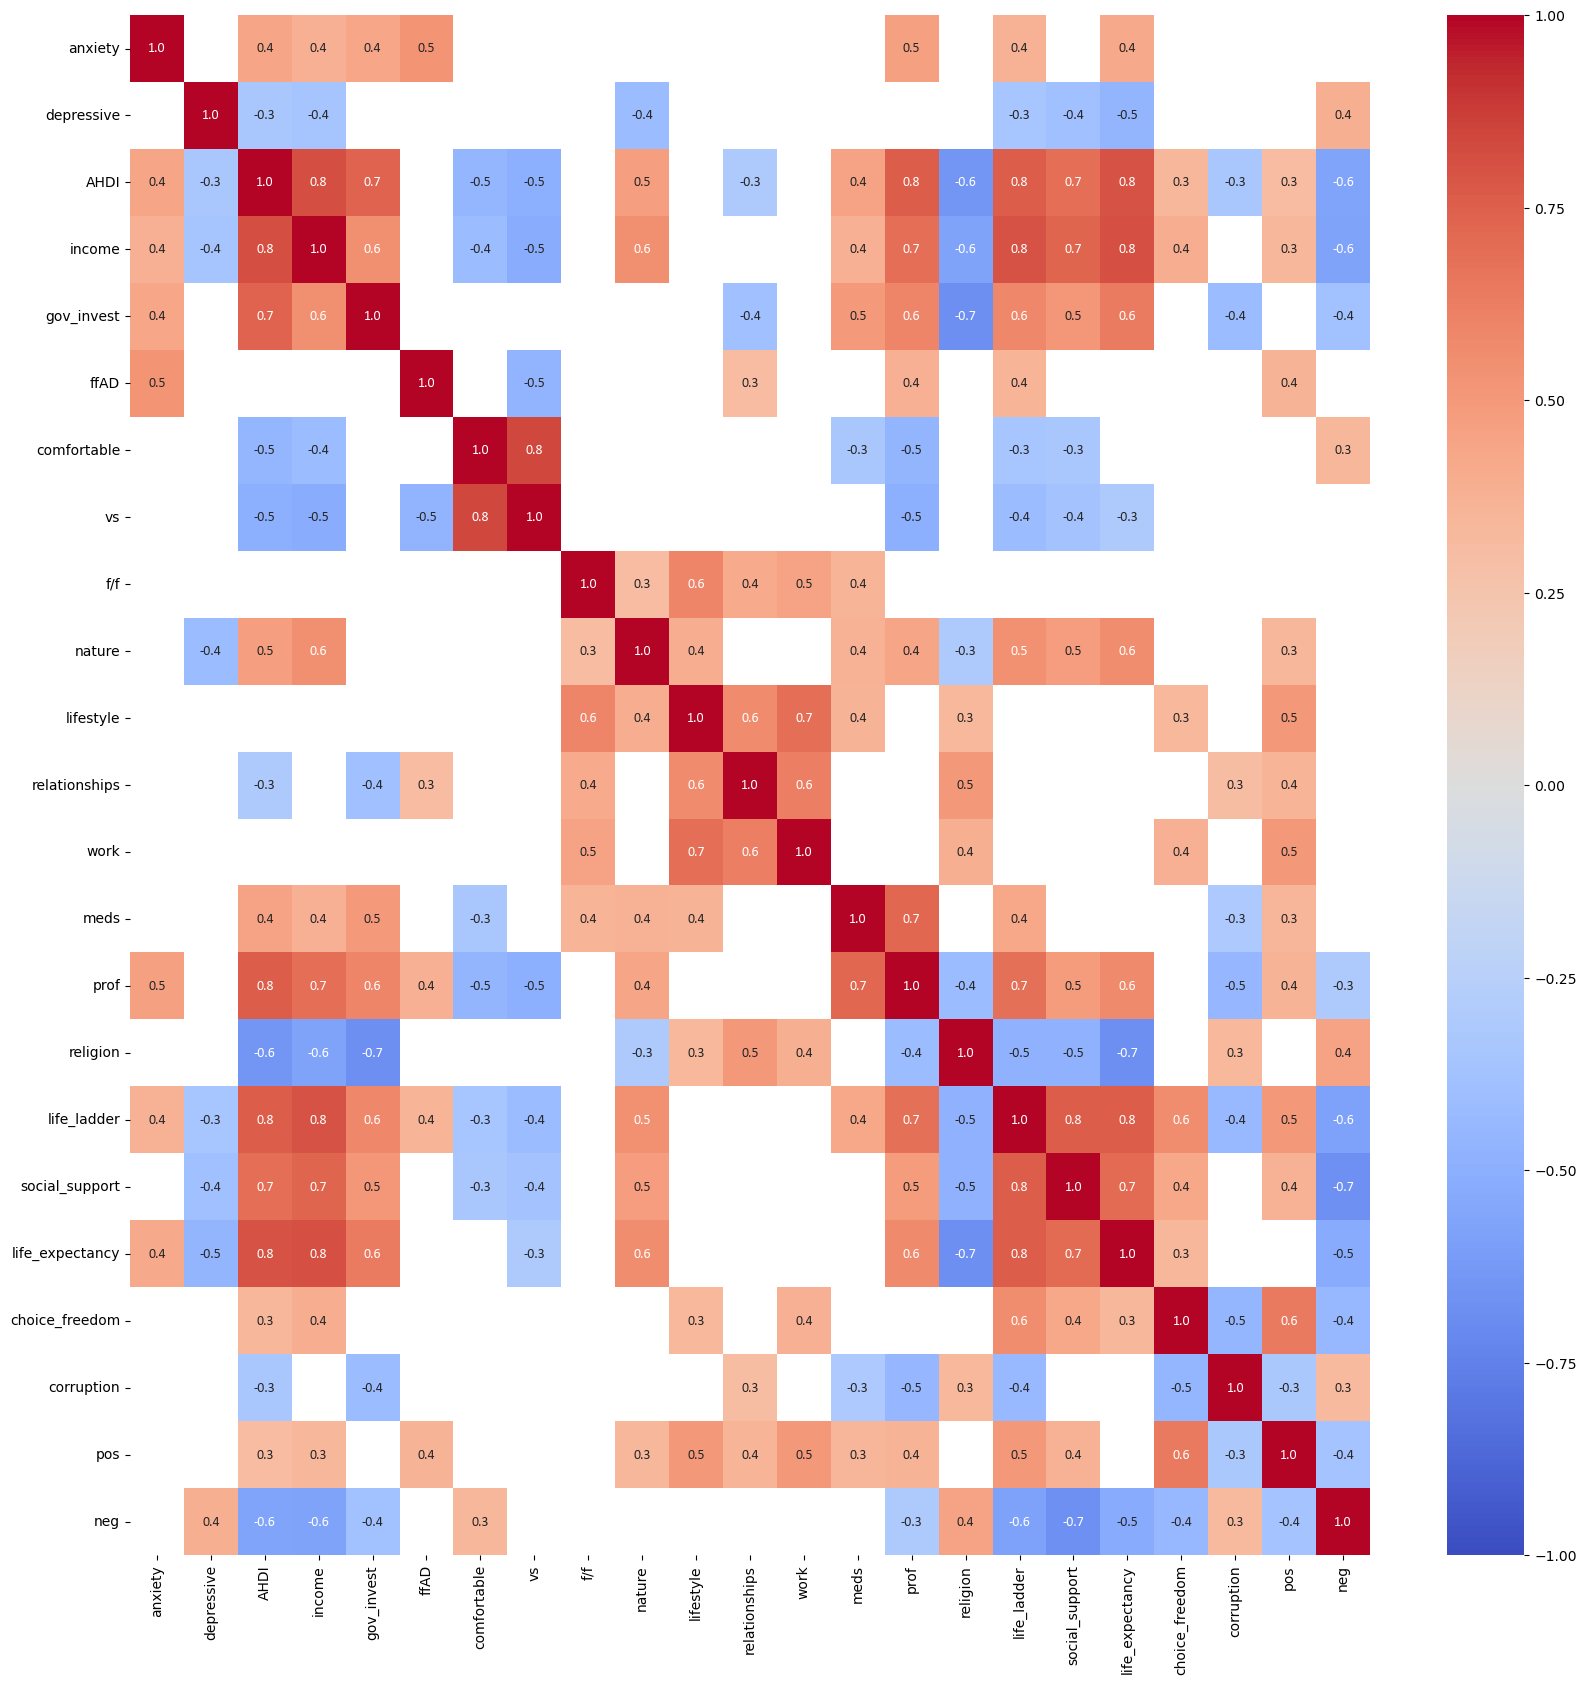

In [33]:
# create subplot with matplotlib
f, ax = plt.subplots(figsize=(20, 20))

# create mask for values outside desired range (-0.3 to 0.3)
mask = (ALL_num_correl.corr() <= -0.3) | (ALL_num_correl.corr() >= 0.3)

# set values outside desired range to NaN
data_masked = ALL_num_correl.corr().where(mask)

# create correlation heatmap in seaborn by applying heatmap onto filtered data
font_settings = {"family": "Calibri", "weight": "normal", "size": 10}
corr = sns.heatmap(data_masked, annot=True, fmt=".1f", cmap='coolwarm', vmin=-1.0, vmax=1.0, ax=ax,
                   annot_kws={"fontdict": font_settings})

# display plot
plt.show()

In [30]:
# export heatmap as .svg

svg_filename = "coco_heatmap_vector.svg"
full_path = r'C:\Users\pears\Desktop\CF\Achievement 6\visuals\\' + svg_filename
corr.get_figure().savefig(full_path, format="svg")

In [31]:
# export heatmap as .svg

svg_filename = "coco_heatmap_pdf.svg"
full_path = r'C:\Users\pears\Desktop\CF\Achievement 6\visuals\\' + svg_filename
corr.get_figure().savefig(full_path, format="pdf")

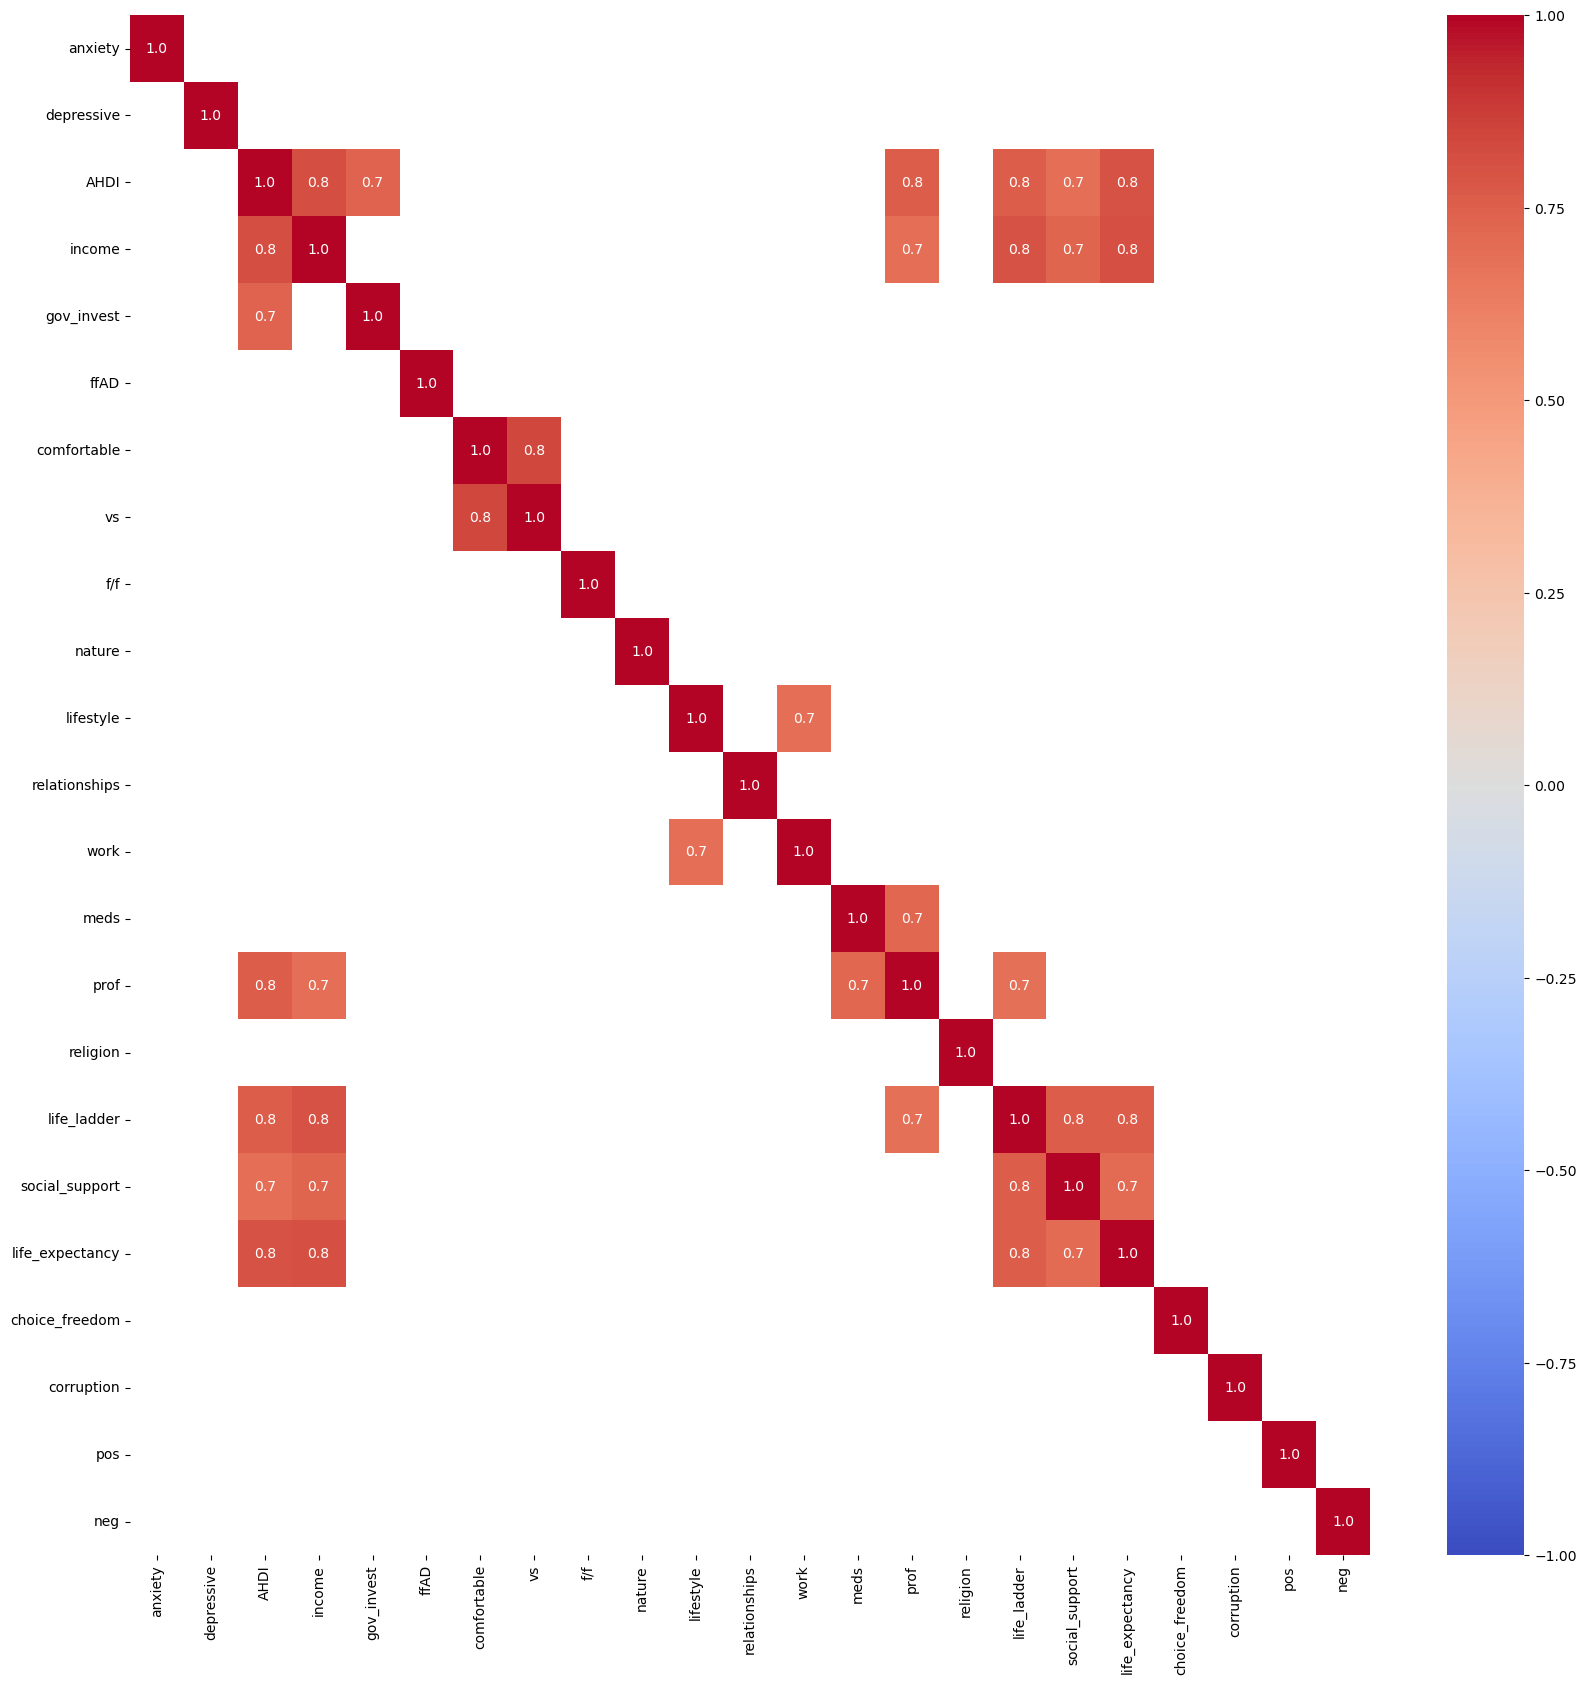

In [45]:
# create subplot with matplotlib
f, ax = plt.subplots(figsize=(20, 20))

# create mask for values outside desired range (-0.7 to 0.7)
mask = (ALL_num_correl.corr() <= -0.7) | (ALL_num_correl.corr() >= 0.68)

# set values outside desired range to NaN
data_masked = ALL_num_correl.corr().where(mask)

# create correlation heatmap in seaborn by applying heatmap onto filtered data
corr = sns.heatmap(data_masked, annot=True, fmt=".1f", cmap='coolwarm', vmin=-1.0, vmax=1.0, ax=ax)

# display plot
plt.show()

#### b. Scatterplots

In [43]:
# create scatterplot in seaborn

sns.lmplot(x = 'Social_support', y = 'Very_comfortable_speaking_about_A/D_with_F/F_YES', data = ALL_num_correl)

KeyError: "None of [Index(['Social_support', 'Very_comfortable_speaking_about_A/D_with_F/F_YES'], dtype='object')] are in the [columns]"

In [ ]:
# create scatterplot in seaborn

sns.lmplot(x = 'AHDI', y = 'Very_comfortable_speaking_about_A/D_with_F/F_YES', data = ALL_num_correl)

In [ ]:
# create scatterplot in seaborn

sns.lmplot(x = 'AHDI', y = 'F/F_have_been_A/D_YES', data = ALL_num_correl)

In [ ]:
# create scatterplot for 'depressive' and 'anxiety' columns in seaborn

sns.lmplot(x = 'Social_support', y = 'F/F_have_been_A/D_YES', data = ALL_num_correl)

In [ ]:
# create scatterplot for 'depressive' and 'anxiety' columns in seaborn

sns.lmplot(x = 'F/F_have_been_A/D_YES', y = 'Social_support', data = ALL_num_correl)

In [ ]:
# create scatterplot for 'depressive' and 'anxiety' columns in seaborn

sns.lmplot(x = 'Social_support', y = 'Income_group', data = ALL_num_correl)

#### c. Pair Plots

In [ ]:
# Create a pair plot 

g = sns.pairplot(ALL_num_correl)

In [ ]:
# subset for specific variables 

sub1 = ALL_num_correl[['Depressive', 'Anxiety', 'Social_support', 'Life_ladder', 'F/F_have_been_A/D_YES', 'Very_comfortable_speaking_about_A/D_with_F/F_YES', 'talked_to_F/F', 'AHDI', 'Income_group', '%Invest']]

In [ ]:
# create a pair plot 

g = sns.pairplot(sub1)

#### d. Categorical Plots

In [ ]:
# define a custom color palette
custom_palette = sns.color_palette(["yellow", "orange", "green", "blue"])

# create categorical plot with the custom color palette
sns.set(style="ticks")
g = sns.catplot(x="Social_support", y="Very_comfortable_speaking_about_A/D_with_F/F_YES", hue="Income_group", data=ALL_num_correl, palette=custom_palette)

# set x-axis ticks with increments of 10
ax = plt.gca()
ax.set_xticks(range(0, 101, 10))  # for increments of 10

# display plot
plt.show()

### 4. Exporting

In [ ]:
# export ALL_num_correl as pickle:

ALL_num_correl.to_pickle(os.path.join(path, '.pkl', 'all_num_correl.pkl'))